In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('archive/NFL Play by Play 2009-2018 (v5).csv')

C:\Users\Josh\AppData\Local\Temp\ipykernel_18300\3412889342.py:1: DtypeWarning: Columns (42,166,167,168,169,174,175,178,179,182,183,188,189,190,191,194,195,203,204,205,218,219,220,231,232,233,238,240,241,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('archive/NFL Play by Play 2009-2018 (v5).csv')


In [3]:
df.shape

(449371, 255)

In [4]:
df['game_date'] = pd.to_datetime(df['game_date'])

# Extract year, month, and day
df['year'] = df['game_date'].dt.year
df['month'] = df['game_date'].dt.month
df['day'] = df['game_date'].dt.day

df = df[df['year'] == 2018]
df.drop(['game_date'], axis=1, inplace=True)
df

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,quarter_seconds_remaining,...,replay_or_challenge,replay_or_challenge_result,penalty_type,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv,year,month,day
407335,37,2018090600,PHI,ATL,ATL,away,PHI,PHI,35.0,900.0,...,0,NaN,NaN,0.0,0.0,0.0,0.0,2018,9,6
407336,52,2018090600,PHI,ATL,ATL,away,PHI,ATL,75.0,900.0,...,0,NaN,False Start,0.0,0.0,0.0,0.0,2018,9,6
407337,75,2018090600,PHI,ATL,ATL,away,PHI,ATL,80.0,900.0,...,0,NaN,NaN,0.0,0.0,0.0,0.0,2018,9,6
407338,104,2018090600,PHI,ATL,ATL,away,PHI,ATL,70.0,862.0,...,0,NaN,NaN,0.0,0.0,0.0,0.0,2018,9,6
407339,125,2018090600,PHI,ATL,ATL,away,PHI,ATL,59.0,826.0,...,0,NaN,NaN,0.0,0.0,0.0,0.0,2018,9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449366,4059,2018121700,CAR,NO,CAR,home,NO,CAR,66.0,63.0,...,0,NaN,NaN,0.0,0.0,0.0,0.0,2018,12,17
449367,4081,2018121700,CAR,NO,CAR,home,NO,CAR,66.0,58.0,...,0,NaN,NaN,0.0,0.0,0.0,0.0,2018,12,17
449368,4106,2018121700,CAR,NO,CAR,home,NO,CAR,61.0,38.0,...,0,NaN,NaN,0.0,0.0,0.0,0.0,2018,12,17
449369,4128,2018121700,CAR,NO,NO,away,CAR,CAR,39.0,35.0,...,0,NaN,NaN,0.0,0.0,0.0,0.0,2018,12,17


In [5]:
df.play_type.value_counts()

play_type
pass           17600
run            12020
no_play         4137
kickoff         2435
punt            2027
extra_point     1064
field_goal       889
qb_kneel         360
qb_spike          75
Name: count, dtype: int64

In [6]:
df['play_type'].unique()

array(['kickoff', 'no_play', 'pass', 'run', 'punt', 'field_goal', nan,
       'qb_kneel', 'extra_point', 'qb_spike'], dtype=object)

In [7]:
df.shape

(42036, 257)

In [8]:
df['play_type'].replace(
    to_replace = 'Sack',
    value='Pass',
    inplace=True
)
relevantPlays = ['run', 'pass', 'punt', 'field_goal', 'qb_kneel','kickoff']
df = df.loc[df['play_type'].isin(relevantPlays)]

C:\Users\Josh\AppData\Local\Temp\ipykernel_18300\2909664435.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['play_type'].replace(


In [9]:
df.shape

(35331, 257)

In [10]:
df = df.dropna(subset = ['posteam'])
df.shape

(35331, 257)

In [11]:
pass_tendencies = {}

# https://www.teamrankings.com/nfl/stat/passing-play-pct?date=2018-02-01
pass_tendencies['ARI'] = 61.32
pass_tendencies['ATL'] = 56.14
pass_tendencies['BAL'] = 56.36
pass_tendencies['BUF'] = 52.12
pass_tendencies['CAR'] = 52.96
pass_tendencies['CHI'] = 54.82
pass_tendencies['CIN'] = 59.33
pass_tendencies['CLE'] = 61.90
pass_tendencies['DAL'] = 52.24
pass_tendencies['DEN'] = 57.49
pass_tendencies['DET'] = 62.96
pass_tendencies['GB'] = 61.36
pass_tendencies['HOU'] = 56.38
pass_tendencies['IND'] = 54.63
pass_tendencies['JAC'] = 50.51
pass_tendencies['KC'] = 59.44
pass_tendencies['SD'] = 58.92
pass_tendencies['STL'] = 55.83
pass_tendencies['OAK'] = 61.13
pass_tendencies['MIA'] = 63.82
pass_tendencies['MIN'] = 54.07
pass_tendencies['NE'] = 59.21
pass_tendencies['NO'] = 56.37
pass_tendencies['NYG'] = 61.97
pass_tendencies['NYJ'] = 56.61
pass_tendencies['PHI'] = 55.42
pass_tendencies['PIT'] = 59.70
pass_tendencies['SEA'] = 59.38
pass_tendencies['SF'] = 61.44
pass_tendencies['TB'] = 62.32
pass_tendencies['TEN'] = 55.41
pass_tendencies['WAS'] = 59.17

In [39]:
df['PassRatio'] = df['posteam'].map(pass_tendencies)
df.ydstogo

407335     0
407337    15
407338     5
407339    10
407340    10
          ..
449364     1
449366    10
449367    10
449368     5
449369    10
Name: ydstogo, Length: 35331, dtype: int64

In [13]:
plays = df['play_type']
isKick = []
for play in plays:
    if play=='kickoff':
        isKick = 1
    else:
        isKick = 0
df['isKick'] = isKick

In [14]:
for play in relevantPlays:
    df2 = df.loc[df['play_type']==play]
    print("Number of ", play, " plays :", df2.shape[0])

Number of  run  plays : 12020
Number of  pass  plays : 17600
Number of  punt  plays : 2027
Number of  field_goal  plays : 889
Number of  qb_kneel  plays : 360
Number of  kickoff  plays : 2435


In [63]:
df.columns

Index(['play_id', 'game_id', 'home_team', 'away_team', 'posteam',
       'posteam_type', 'defteam', 'side_of_field', 'yardline_100',
       'quarter_seconds_remaining',
       ...
       'penalty_type', 'defensive_two_point_attempt',
       'defensive_two_point_conv', 'defensive_extra_point_attempt',
       'defensive_extra_point_conv', 'year', 'month', 'day', 'PassRatio',
       'isKick'],
      dtype='object', length=259)

In [103]:
df.head()

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,quarter_seconds_remaining,...,penalty_type,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv,year,month,day,PassRatio,isKick
407335,37,2018090600,PHI,ATL,ATL,away,PHI,PHI,35.0,900.0,...,NaN,0.0,0.0,0.0,0.0,2018,9,6,56.14,0
407337,75,2018090600,PHI,ATL,ATL,away,PHI,ATL,80.0,900.0,...,NaN,0.0,0.0,0.0,0.0,2018,9,6,56.14,0
407338,104,2018090600,PHI,ATL,ATL,away,PHI,ATL,70.0,862.0,...,NaN,0.0,0.0,0.0,0.0,2018,9,6,56.14,0
407339,125,2018090600,PHI,ATL,ATL,away,PHI,ATL,59.0,826.0,...,NaN,0.0,0.0,0.0,0.0,2018,9,6,56.14,0
407340,146,2018090600,PHI,ATL,ATL,away,PHI,PHI,39.0,790.0,...,NaN,0.0,0.0,0.0,0.0,2018,9,6,56.14,0


In [100]:
# X = df.drop(['play_type','run_gap', 'pass_length','pass_location','field_goal_result','field_goal_attempt', 'time', 'play_id', 'pass_attempt', 'rush_attempt', 'punt_attempt', 'kickoff_attempt', 'qb_dropback', 'run_location', 'punter_player_id','air_yards', 'rusher_player_name', 'air_epa', 'punter_player_name', 'rusher_player_id', 'passer_player_name', 'passer_player_id', 'punt_returner_player_name', 'punt_downed', 'punt_returner_player_id', 'air_wpa', 'punt_out_of_bounds', 'yac_wpa', 'yac_epa', 'first_down_rush'], axis = 1)
X = df[['down', 'ydstogo', 'yardline_100', 'PassRatio', 'quarter_seconds_remaining','half_seconds_remaining', 'drive', ]]
y = df['play_type']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
for play in relevantPlays:
    df2 = y_train.loc[y_train==play]
    print("Number of ", play, " plays :", df2.shape[0])

Number of  run  plays : 9624
Number of  pass  plays : 14021
Number of  punt  plays : 1653
Number of  field_goal  plays : 707
Number of  qb_kneel  plays : 278
Number of  kickoff  plays : 1981


In [27]:
probs = []
for play in relevantPlays:
    df2 = y_train.loc[y_train==play]
    probs.append(df2.shape[0] / y_train.shape[0])

probs

[0.34050382111519956,
 0.4960727427115766,
 0.05848429097084631,
 0.025014152278516843,
 0.009835833569204642,
 0.0700891593546561]

Accuracy: 70.85%
              precision    recall  f1-score   support

  field_goal       0.85      0.89      0.87       182
     kickoff       0.99      1.00      1.00       454
        pass       0.71      0.74      0.72      3579
        punt       0.92      0.95      0.94       374
    qb_kneel       0.86      0.61      0.71        82
         run       0.60      0.55      0.58      2396

    accuracy                           0.71      7067
   macro avg       0.82      0.79      0.80      7067
weighted avg       0.71      0.71      0.71      7067



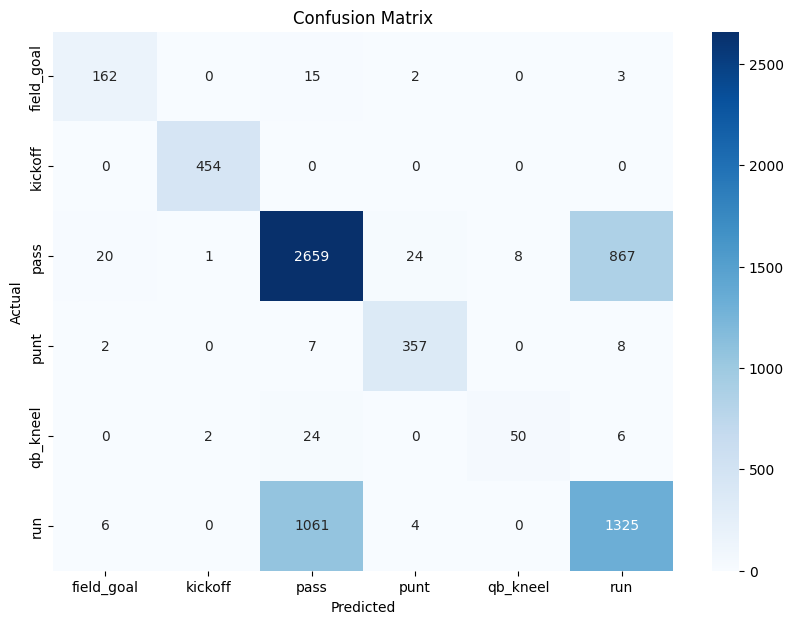

In [113]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode target labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert object columns to categorical
categorical_columns = X_train.select_dtypes(include=['object']).columns
for col in categorical_columns:
    X_train[col] = X_train[col].astype('category')
    X_test[col] = X_test[col].astype('category')

# Enable categorical support
model = XGBClassifier(tree_method="hist", enable_categorical=True)
model.fit(X_train, y_train_encoded)


# Predict
y_pred_encoded = model.predict(X_test)

# Decode predictions back to original labels (optional)
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Calculate metrics
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
conf_matrix = confusion_matrix(y_test_encoded, y_pred_encoded)


plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [102]:
importance = model.feature_importances_

# Map importance to feature names
features = X_train.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

print(importance_df)



                     Feature  Importance
0                       down    0.785255
1                    ydstogo    0.061895
2               yardline_100    0.052845
5     half_seconds_remaining    0.045060
6                      drive    0.020152
3                  PassRatio    0.017734
4  quarter_seconds_remaining    0.017059


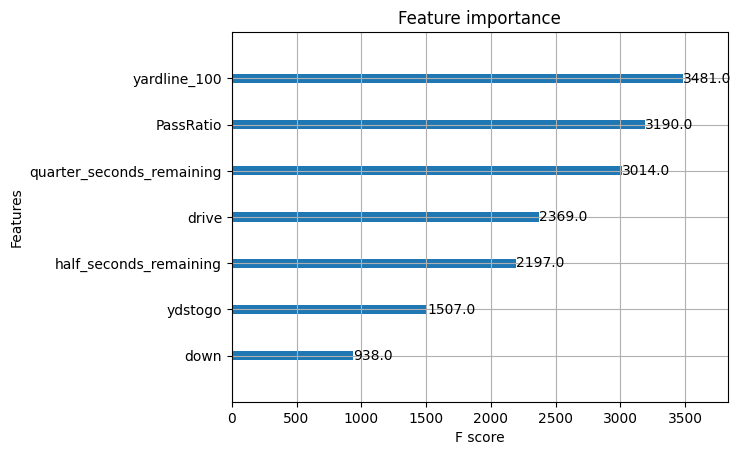

In [116]:
from xgboost import plot_importance
plot_importance(model)
plt.show()


C:\Users\Josh\AppData\Local\Temp\ipykernel_18300\936004619.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=play_type_counts.index, y=play_type_counts.values, palette='viridis')


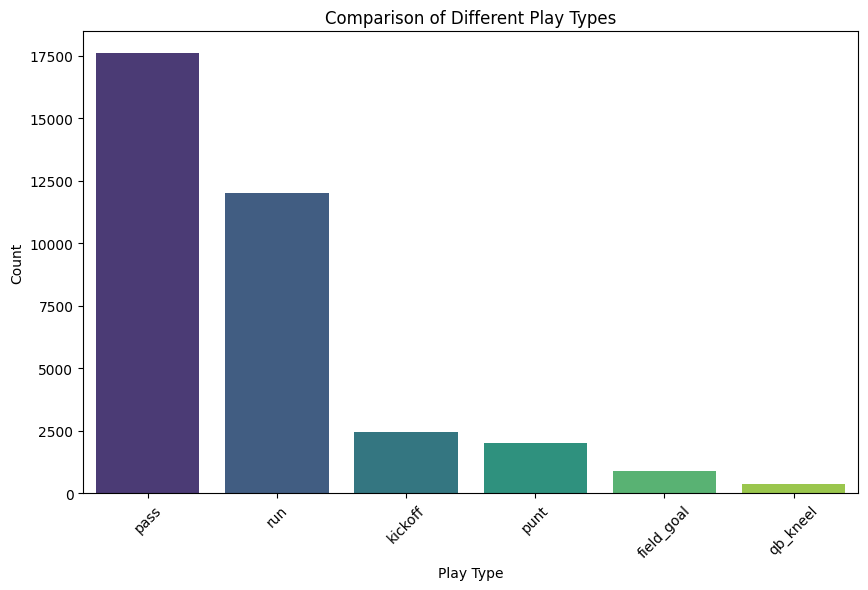

In [110]:
play_type_counts = df['play_type'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=play_type_counts.index, y=play_type_counts.values, palette='viridis')
plt.title('Comparison of Different Play Types')
plt.xlabel('Play Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()